<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=2634a3333b0d4467ac20a2f5fc4e0abd151875cf8c7fe9f6226663bca76d1a3a
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [19]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [20]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [21]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [22]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [23]:
data_at_job = data_at_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [26]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [27]:
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [28]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 32.66186321156931
Interpolated Value: 106.43888510797046
Interpolated Value: 51.52034987512487
Interpolated Value: 92.51695900253594
Interpolated Value: 84.30458579881656
Interpolated Value: 49.19045875999001
Interpolated Value: 73.5480698005698
Interpolated Value: 48.21161777089524
Interpolated Value: 33.808428957649944
Interpolated Value: 37.36983237973152
Interpolated Value: 31.84670231424676
Interpolated Value: 42.46080091138762
Interpolated Value: 40.323063787065486
Interpolated Value: 1.4198473282442747
Interpolated Value: 2.4215686274509802
Interpolated Value: 1.4782608695652173
Interpolated Value: 2.0140845070422535
Interpolated Value: 4.064516129032258
Interpolated Value: 1.564102564102564
Interpolated Value: 2.891304347826087
Interpolated Value: 2.5369127516778525
Interpolated Value: 2.7857142857142856
Interpolated Value: 1.7253521126760563
Interpolated Value: 2.259493670886076
Interpolated Value: 2.4
Interpolated Value: 2.5
Interpolated Value: 35.51976284

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.921985815602837
Interpolated Value: 3.967741935483871
Interpolated Value: 3.911764705882353
Interpolated Value: 4.0256410256410255
Interpolated Value: nan
Interpolated Value: 3.196078431372549
Interpolated Value: 2.727272727272727
Interpolated Value: 2.4
Interpolated Value: 2.966666666666667
Interpolated Value: 2.871794871794872
Interpolated Value: 2.9347826086956523
Interpolated Value: 3.306122448979592
Interpolated Value: 3.4285714285714284
Interpolated Value: 2.9645390070921986
Interpolated Value: 3.3974358974358974
Interpolated Value: 3.5428571428571427
Interpolated Value: 3.3902439024390243
Interpolated Value: nan
Interpolated Value: 3.8137254901960786
Interpolated Value: 3.772727272727273
Interpolated Value: 3.1549295774647885
Interpolated Value: 3.6551724137931036
Interpolated Value: 3.6923076923076925
Interpolated Value: 3.466666666666667
Interpolated Value: 3.523489932885906
Interpolated Value: 3.732142857142857
Interpolated Value: 3.375886524822695
Inter

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.739130434782609
Interpolated Value: 2.8309859154929575
Interpolated Value: 2.7096774193548385
Interpolated Value: 2.9743589743589745
Interpolated Value: 2.869565217391304
Interpolated Value: 2.597315436241611
Interpolated Value: 2.746987951807229
Interpolated Value: 2.4893617021276597
Interpolated Value: 2.4746835443037973
Interpolated Value: 2.1159420289855073
Interpolated Value: 2.4523809523809526
Interpolated Value: 3.436293436293436
Interpolated Value: 3.5
Interpolated Value: 3.608695652173913
Interpolated Value: 3.4714285714285715
Interpolated Value: 3.5
Interpolated Value: 3.7435897435897436
Interpolated Value: 2.977777777777778
Interpolated Value: 3.469798657718121
Interpolated Value: 3.581818181818182
Interpolated Value: 3.2785714285714285
Interpolated Value: 3.6455696202531644
Interpolated Value: 3.4925373134328357
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.6384615384615384
Interpolated Value: 3.2525252525252526
Interpolated Value: 3.130

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.2574850299401197
Interpolated Value: 3.288732394366197
Interpolated Value: 3.3987341772151898
Interpolated Value: 3.2753623188405796
Interpolated Value: 3.4047619047619047
Interpolated Value: 2.8505747126436782
Interpolated Value: 3.9411764705882355
Interpolated Value: 3.4782608695652173
Interpolated Value: 3.7183098591549295
Interpolated Value: 3.774193548387097
Interpolated Value: 3.473684210526316
Interpolated Value: 3.533333333333333
Interpolated Value: 3.3691275167785233
Interpolated Value: 3.0419161676646707
Interpolated Value: 2.9225352112676055
Interpolated Value: 3.1656050955414012
Interpolated Value: 2.8857142857142857
Interpolated Value: 3.0476190476190474


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [29]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1.         2.         2.23188406 2.73333333 3.         4.
 5.        ]
Follow_commands : [1.         2.         3.         3.26666667 3.76811594 4.
 5.        ]
Before: Do_differently : [1.         2.         2.75362319 3.         3.27586207 3.32857143
 3.41134752 3.57777778 4.         5.        ]
Do_differently : [1.         2.         2.42222222 2.58865248 2.67142857 2.72413793
 3.         3.24637681 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.11594203 2.4893617  2.55938697 2.74698795
 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.25301205 3.44061303 3.5106383
 3.88405797 4.         5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [30]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [31]:
data_at_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,1.0,4.0,4.0,30.000000,15.000000,4.833333,4.333333,3.00,5.000000,4.8
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.4
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,3.0,2.0,1.0,0.000000,10.000000,1.500000,2.166667,2.75,3.333333,2.2
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.8
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,27.0,9.0,18.907500,3.0,35.000000,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.6
1298,80.0,13.0,40.323064,6.0,32.128205,114.749140,2.0,4.0,4.0,22.919488,36.079003,3.000000,4.000000,3.50,3.000000,3.6
1299,27.0,9.0,22.061538,3.0,30.000000,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.0
1300,28.0,9.0,13.461538,3.0,42.000000,116.666667,4.0,1.0,5.0,4.761905,95.238095,2.333333,1.500000,1.50,3.000000,1.6


In [32]:
## Taking only academic positions:

data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

**Contract duration has 7 values, but only 6 possible responses. To remove the "Other" and leave only 1-5?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [33]:
np.sort(data_at_formatted_academic['Contract_duration'].unique())
data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,369
3.0,307
2.0,210
6.0,86
4.0,14
7.0,8
5.0,4


In [35]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,679
2.0,149
3.0,135
4.0,35


In [36]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Contract_duration']<6].reset_index(drop=True)
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,344
3.0,305
2.0,207
4.0,14
5.0,4


In [37]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,637
3.0,120
2.0,117


In [38]:
data_at_formatted_academic.to_csv('data_at_formatted_academic.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.400000
1,34.0,8.0,17.884615,3.0,50.0,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.800000
2,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.800000
3,56.0,12.0,6.923077,1.0,40.0,100.000000,1.0,4.0,4.0,28.571429,47.619048,3.666667,4.500000,4.75,5.000000,3.255072
4,36.0,8.0,48.211618,3.0,40.0,100.000000,1.0,2.0,5.0,15.094340,56.603774,3.666667,3.166667,3.50,3.000000,2.368919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,48.0,11.0,31.846702,1.0,23.0,100.000000,1.0,1.0,4.0,9.491973,56.926414,3.666667,2.333333,2.00,2.000000,3.400000
870,40.0,11.0,25.961538,1.0,40.0,100.000000,1.0,1.0,2.0,38.223906,38.223906,2.333333,4.833333,5.00,5.000000,3.800000
871,27.0,9.0,18.907500,3.0,35.0,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.600000
872,27.0,9.0,22.061538,3.0,30.0,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.000000


In [39]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'])

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_at_formatted_academic_w_dummies.columns:
  data_at_formatted_academic_w_dummies[col+'_mod_Age'] = data_at_formatted_academic_w_dummies[col] * data_at_formatted_academic_w_dummies['Age']

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_at_formatted_academic_w_dummies.to_csv('data_at_formatted_academic_w_dummies.csv')

print(data_at_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_at_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_2.0', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Current_position_7.0', 'Current_position_8.0', 'Current_position_9.0', 'Current_position_10.0', 'Current_position_11.0', 'Current_position_12.0', 'Contract_duration_1.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_4.0', 'Contract_duration_5.0', 'Leadership_position_1.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age',

<Axes: >

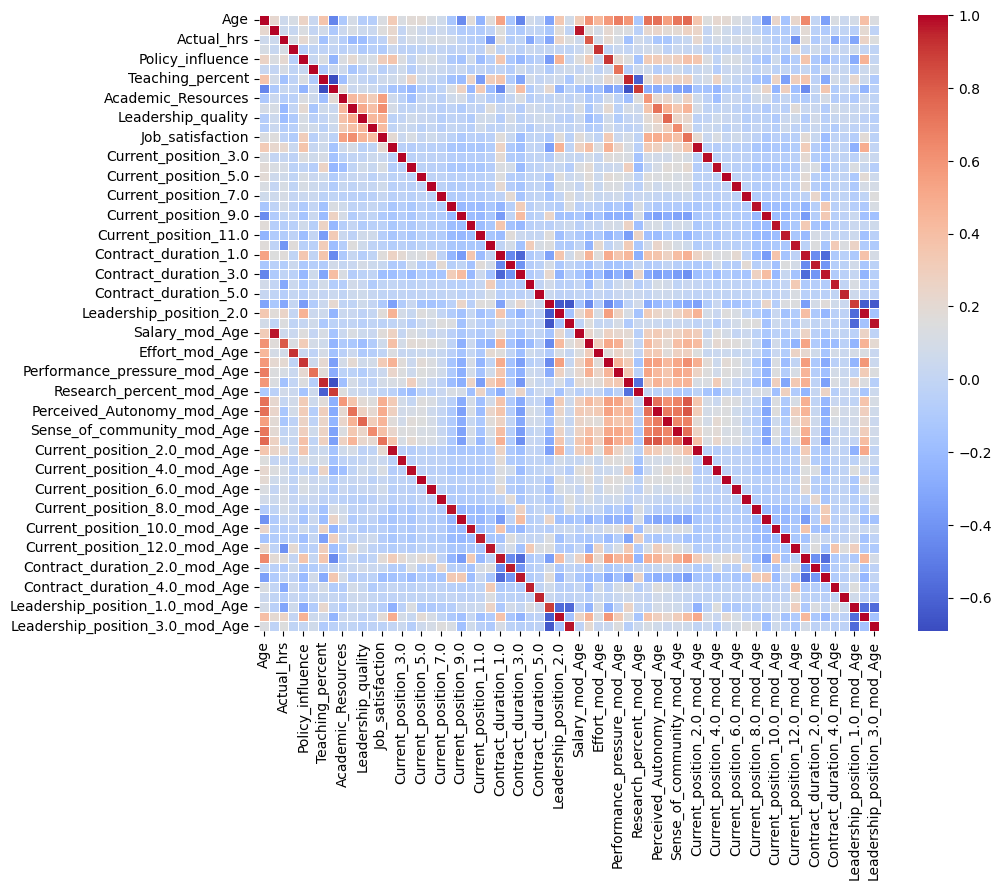

In [40]:
correlations = data_at_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(
    correlations,
    annot=False,     # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a diverging color palette for better contrast
    fmt=".2f",      # Format the annotations to two decimal places
    linewidths=.5   # Add lines to separate the cells
)

## Calculating Cronbach's Alpha for the combined factors:

In [41]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [42]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(~data_at_job_w_inversion['Current_position'].isin([1., 13.])) &
                                                     (data_at_job_w_inversion['Contract_duration']<6) &
                                                     (data_at_job_w_inversion['Leadership_position']<4)].dropna()

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





874
Academic Resources Cronbach Alpha: 0.7635545350612548
Perceived Autonomy Cronbach Alpha: 0.8657873718566688
Leadership Quality Cronbach Alpha: 0.8952775206192825
Sense of Community Cronbach Alpha: 0.8656061362992502
---------------------
Job Satisfaction Cronbach Alpha: 0.7598127236689847


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [70]:
data_at_formatted_academic_w_dummies['Contract_duration_5.0'].value_counts()

,count
Contract_duration_5.0,
0.0,870
1.0,4


In [43]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_1.0',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_4.0',
 'Contract_duration_5.0',
 'Leadership_position_1.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [44]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_2.0_mod_Age',
 'Current_position_3.0_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Current_position_7.0_mod_Age',
 'Current_position_8.0_mod_Age',
 'Current_position_9.0_mod_Age',
 'Current_position_10.0_mod_Age',
 'Current_position_11.0_mod_Age',
 'Current_position_12.0_mod_Age',
 'Contract_duration_1.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_4.0_mod_Age',
 'Contract_duration_5.0_mod_Age',
 'Leadership_position_1.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [45]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

# path = f"""
# Salary ~ {Current_position_factors}
# """



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_1.0 ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_1.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [46]:
model = semopy.Model(path)
result = model.fit(data_at_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 53.715
Number of iterations: 868
Params: 91.311 7.349 49.494 42.352 11.372 47.532 14.211 -6.467 1.631 -2.679 8.355 12.824 4.762 8.104 10.813 10.594 10.214 5.829 2.965 1.093 0.841 -14.087 1.915 0.944 -7.546 -16.673 -1.118 -7.491 -6.631 1.210 -5.593 -6.402 36.514 1.328 0.932 -0.054 0.978 0.612 0.173 -0.265 -0.345 0.162 -0.452 -0.232 0.067 0.439 -0.266 0.261 0.278 0.216 -0.009 0.087 -0.155 0.005 -0.170 3.421 15.167 21.907 13.615 -0.365 -6.350 -11.196 -12.490 13.929 -21.939 25.430 -23.057 -34.944 -31.993 -33.171 -21.813 -12.393 -2.194 5.350 -23.609 9.237 -26.505 0.156 -0.144 -0.473 0.059 0.099 -0.146 0.117 0.159 -0.117 0.063 -0.172 0.294 -0.058 -0.051 0.151 -0.103 -0.234 -0.052 -0.167 0.009 -0.058 0.476 -0.137 -0.032 0.295 0.296 0.112 -0.354 -0.058 -0.067 -0.240 0.178 0.264 -0.053 0.304 0.086 -0.287 0.073 -0.240 0.023 -0.031 -0.131 0.156 -0.060 0.438 0.589 0.218 

In [47]:
ins = model.inspect()
print(ins)
ins.to_csv('Model Parameter Values.csv')

                   lval  op                  rval     Estimate    Std. Err  \
0                Salary   ~  Current_position_2.0    91.311085   28.325715   
1                Salary   ~  Current_position_3.0     7.348999   31.293125   
2                Salary   ~  Current_position_4.0    49.493897   28.492474   
3                Salary   ~  Current_position_5.0    42.352254   34.310901   
4                Salary   ~  Current_position_6.0    11.371787   30.032161   
..                  ...  ..                   ...          ...         ...   
273    Research_percent  ~~      Research_percent   476.667386   22.802093   
274              Salary  ~~                Salary  5491.305655  262.684773   
275  Sense_of_community  ~~    Sense_of_community     0.907718    0.043422   
276    Teaching_percent  ~~      Teaching_percent   382.824651   18.312987   
277    Job_satisfaction  ~~      Job_satisfaction     0.028387    0.001358   

       z-value   p-value  
0     3.223611  0.001266  
1     0.2

In [48]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Salary,~,Current_position_2.0,91.311085,28.325715,3.223611,0.001266
11,Actual_hrs,~,Current_position_2.0,12.824360,4.199542,3.053752,0.002260
14,Actual_hrs,~,Current_position_5.0,10.812893,5.086900,2.125635,0.033534
15,Actual_hrs,~,Current_position_6.0,10.593923,4.452538,2.379300,0.017346
16,Actual_hrs,~,Current_position_7.0,10.213955,4.437653,2.301657,0.021355
...,...,...,...,...,...,...,...
273,Research_percent,~~,Research_percent,476.667386,22.802093,20.904545,0.000000
274,Salary,~~,Salary,5491.305655,262.684773,20.904545,0.000000
275,Sense_of_community,~~,Sense_of_community,0.907718,0.043422,20.904545,0.000000
276,Teaching_percent,~~,Teaching_percent,382.824651,18.312987,20.904545,0.000000


In [49]:
ins

# Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
# Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
# Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_2.0,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0,Current_position_9.0,Current_position_10.0,Current_position_11.0,Current_position_12.0
0,Salary,91.311085,7.348999,49.493897,42.352254,11.371787,47.531813,14.210811,-6.467214,1.630562,-2.679392,8.354526
1,Actual_hrs,12.824360,4.762458,8.104070,10.812893,10.593923,10.213955,5.828739,2.964821,1.093036,0.841496,-14.086899
2,Effort,1.914942,0.944107,-7.545859,-16.673318,-1.117827,-7.490903,-6.630524,1.209996,-5.592593,-6.401732,36.513713
3,Policy_influence,1.328255,0.931514,-0.053893,0.978290,0.612016,0.173463,-0.264795,-0.344821,0.162464,-0.451503,-0.232064
4,Performance_pressure,0.066943,0.439452,-0.265661,0.261437,0.277723,0.215832,-0.009054,0.087267,-0.155481,0.004882,-0.170462
5,Teaching_percent,3.420889,15.166620,21.907286,13.614754,-0.364920,-6.349872,-11.195717,-12.490070,13.928579,-21.939468,25.430053
6,Research_percent,-23.057133,-34.944328,-31.992677,-33.170740,-21.813096,-12.393402,-2.194191,5.350260,-23.608516,9.237374,-26.504528
7,Academic_Resources,0.156488,-0.144472,-0.472824,0.058619,0.098586,-0.146430,0.117468,0.158664,-0.116582,0.062776,-0.172132
8,Perceived_Autonomy,0.294465,-0.057554,-0.050997,0.150776,-0.102964,-0.234462,-0.051931,-0.167248,0.008935,-0.057754,0.476166
9,Leadership_quality,-0.137181,-0.032323,0.294715,0.296133,0.112252,-0.354144,-0.058474,-0.066917,-0.240059,0.177565,0.264228


In [50]:
mod_age_paths

,lval,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,Current_position_11.0_mod_Age,Current_position_12.0_mod_Age,Contract_duration_1.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_4.0_mod_Age,Contract_duration_5.0_mod_Age,Leadership_position_1.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,Job_satisfaction,-0.000008,-0.000088,-0.000006,-0.001658,0.000474,-0.000039,-0.000007,-0.006378,-0.004836,...,0.000933,0.002501,-0.003024,-0.002729,-0.000427,-0.008074,0.002481,-0.003133,-0.004258,-0.002148


In [74]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    try:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)])* float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    except:
      path_coeff.append(np.nan)
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,0.035437,0.049223,0.000555,0.088316,-0.001274,0.005700,-0.020331,0.044897,0.066885,-0.016081,-0.007814,0.021262,-0.003534,0.024502,-0.000444,NaN,0.001455,0.026228,0.000763
1,Current_position_3.0,0.002852,0.018279,0.000274,0.061936,-0.008361,0.025272,-0.030813,-0.041450,-0.013073,-0.003789,0.045254,0.028581,-0.005734,0.028360,-0.004800,NaN,0.000677,0.009311,-0.002203
2,Current_position_4.0,0.019208,0.031105,-0.002186,-0.003583,0.005054,0.036505,-0.028210,-0.135656,-0.011583,0.034548,0.012844,0.010570,0.003294,0.028413,-0.004806,NaN,-0.000167,0.001364,0.003782
3,Current_position_5.0,0.016437,0.041503,-0.004831,0.065047,-0.004974,0.022687,-0.029249,0.016818,0.034247,0.034714,-0.042599,0.028551,-0.005725,0.028344,-0.004793,NaN,0.001536,0.021404,-0.004751
4,Current_position_6.0,0.004413,0.040662,-0.000324,0.040693,-0.005284,-0.000608,-0.019234,0.028285,-0.023387,0.013159,0.010844,0.025330,-0.004113,0.028339,-0.004798,NaN,0.000980,0.009276,-0.006901
5,Current_position_7.0,0.018447,0.039204,-0.002170,0.011534,-0.004106,-0.010581,-0.010928,-0.042012,-0.053256,-0.041515,-0.035675,-0.004170,0.010661,0.028391,-0.004805,NaN,0.000745,-0.000593,-0.011999
6,Current_position_8.0,0.005515,0.022372,-0.001921,-0.017606,0.000172,-0.018656,-0.001935,0.033702,-0.011795,-0.006855,0.003400,-0.012859,-0.001458,-0.029047,-0.004805,NaN,0.000091,-0.003553,-0.004542
7,Current_position_9.0,-0.002510,0.011380,0.000351,-0.022927,-0.001660,-0.020812,0.004718,0.045521,-0.037989,-0.007844,-0.004598,-0.018875,-0.000392,-0.036481,-0.004808,NaN,-0.000661,-0.005957,0.004911
8,Current_position_10.0,0.000633,0.004195,-0.001620,0.010802,0.002958,0.023210,-0.020818,-0.033448,0.002029,-0.028141,-0.019471,0.019790,-0.003818,0.019611,-0.004805,NaN,0.000125,0.000073,-0.001865
9,Current_position_11.0,-0.001040,0.003230,-0.001855,-0.030020,-0.000093,-0.036558,0.008145,0.018011,-0.013118,0.020815,0.023201,-0.010603,0.003762,-0.005027,0.000839,NaN,-0.000471,-0.006541,0.001478


## Bootstrapping:

<Axes: >

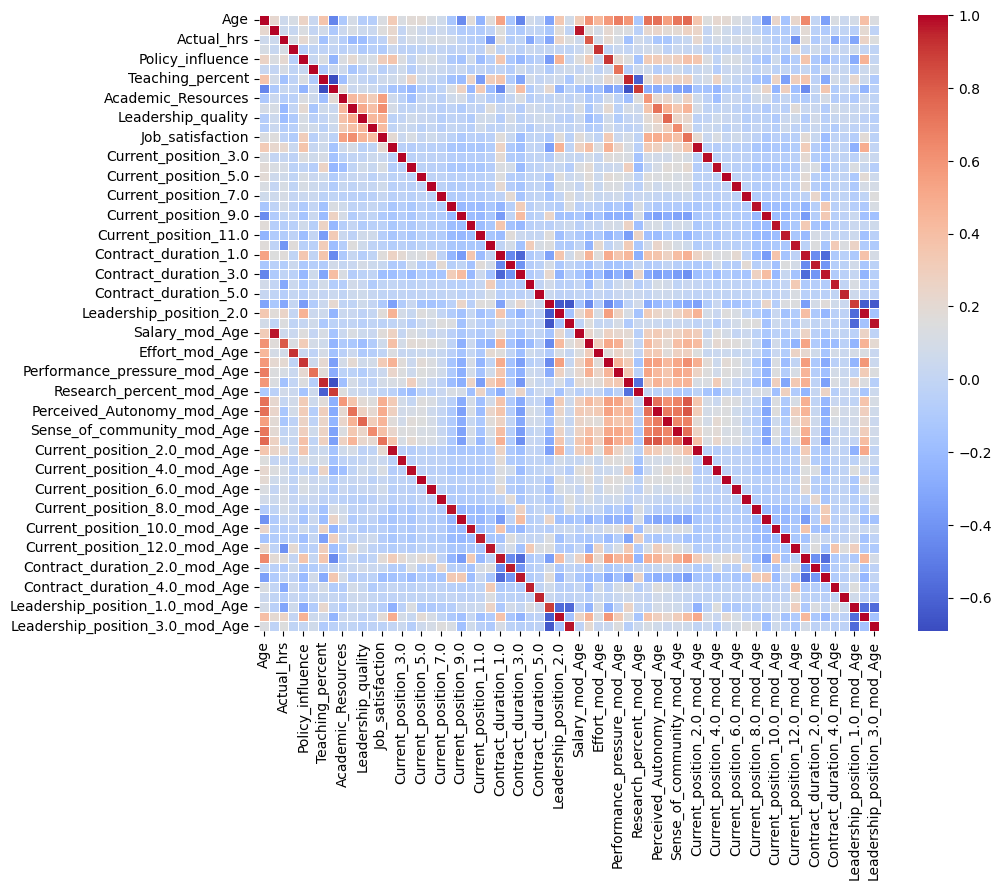

In [75]:
correlations = data_at_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(
    correlations,
    annot=False,     # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a diverging color palette for better contrast
    fmt=".2f",      # Format the annotations to two decimal places
    linewidths=.5   # Add lines to separate the cells
)

In [89]:
times = 200

bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)

for i in range(times):
  data_at_bootstrapped = data_at_formatted_academic_w_dummies.sample(n=len(data_at_formatted_academic_w_dummies), replace=True).reset_index(drop=True)

  try:
    model = semopy.Model(path)
    result = model.fit(data_at_bootstrapped)
    ins = model.inspect()

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        try:
          path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                            (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                            (ins['lval']=='Job_satisfaction')].iloc[0]))
        except:
          path_coeff.append(np.nan)
      bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff
  except:
    pass


bootstrap_path_values

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)


,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_2.0,0.018636,0.030861,0.002217,0.082815,-0.000914,0.004082,-0.028637,0.045002,...,-0.039089,-0.053705,0.007385,-0.005761,0.035778,-0.003675,NaN,0.008590,0.015868,-0.000037
1,0,Current_position_3.0,0.004365,0.001812,-0.003268,0.044750,0.002439,0.026550,-0.041314,-0.035387,...,0.026538,0.032744,0.010837,-0.022764,0.035770,-0.003677,NaN,0.002025,-0.000078,0.000112
2,0,Current_position_4.0,0.009241,0.026791,0.000392,0.005413,-0.002207,0.021008,-0.038432,-0.142272,...,-0.007490,0.004749,0.004394,0.009011,0.035825,-0.003679,NaN,-0.000911,0.002376,-0.000125
3,0,Current_position_5.0,0.002686,0.039506,0.001838,0.066471,0.001015,0.002473,-0.031209,0.007010,...,-0.011316,-0.062433,0.010826,-0.022729,0.035750,-0.003675,NaN,0.007830,0.015376,-0.000063
4,0,Current_position_6.0,0.002518,0.028582,0.002395,0.038746,0.002345,0.004290,-0.029799,0.048063,...,0.025833,0.027906,0.009483,-0.016121,0.035746,-0.003673,NaN,0.007046,0.006732,0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,199,Current_position_8.0,0.001966,0.015817,0.001500,-0.034163,0.000010,-0.018612,0.005328,0.057770,...,-0.002780,0.011073,-0.024888,-0.000761,-0.048139,-0.006914,NaN,0.000155,0.002898,-0.002053
2141,199,Current_position_9.0,-0.005983,0.003286,-0.001339,-0.056096,-0.003890,-0.017895,0.009544,0.027109,...,-0.031271,-0.034737,-0.033710,-0.000403,-0.055853,-0.006910,NaN,0.010781,0.006085,0.003208
2142,199,Current_position_10.0,-0.006454,-0.005210,0.001327,0.016049,0.003657,0.029752,-0.032732,-0.040608,...,-0.027702,-0.012120,0.034637,-0.001221,0.026736,-0.006909,NaN,-0.000770,0.000255,-0.000744
2143,199,Current_position_11.0,-0.006411,-0.006510,0.000841,-0.049142,-0.001144,-0.031399,0.011733,0.005279,...,0.020644,0.017055,-0.023719,0.001588,-0.007538,0.005509,NaN,0.008043,0.006361,0.001032


In [90]:
bootstrap_path_values.to_csv('AT_bootstrap_path_values.csv')

Analyzing the bootstrap results:

In [91]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  for col in data.iloc[:, 2:]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals

mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,0.031174,0.037967,0.000594,0.094851,-0.000262,0.007969,-0.025257,0.042051,0.065498,-0.018305,-0.008615,0.022508,-0.001666,0.022582,0.000557,NaN,0.001290,0.028164,0.001038
1,Current_position_3.0,0.004577,0.007728,-0.002436,0.065553,-0.002155,0.025887,-0.039586,-0.041685,-0.012689,-0.003698,0.043971,0.030397,-0.003068,0.025781,-0.004214,NaN,0.000810,0.009753,-0.002466
2,Current_position_4.0,0.019732,0.019801,-0.001755,-0.003322,0.001414,0.037770,-0.035970,-0.127170,-0.014010,0.036753,0.012923,0.011366,0.001953,0.025840,-0.004220,NaN,-0.000135,0.002084,0.004488
3,Current_position_5.0,0.020976,0.030119,-0.001391,0.069918,-0.000406,0.020980,-0.032850,0.017200,0.039126,0.034648,-0.042052,0.030379,-0.003065,0.025779,-0.004209,NaN,0.001773,0.023368,-0.005552
4,Current_position_6.0,0.004180,0.030460,-0.001128,0.042880,-0.001069,0.002863,-0.024255,0.024673,-0.024815,0.013808,0.010858,0.027181,-0.002254,0.025781,-0.004212,NaN,0.000773,0.009983,-0.007584
5,Current_position_7.0,0.015581,0.028288,-0.000364,0.012258,-0.001251,-0.006523,-0.011575,-0.036857,-0.050743,-0.041313,-0.032803,-0.004313,0.005686,0.025817,-0.004218,NaN,0.000665,0.000715,-0.013390
6,Current_position_8.0,0.001886,0.011449,-0.000085,-0.018271,0.000065,-0.014365,0.000217,0.032371,-0.010224,-0.006069,0.003546,-0.013432,-0.000750,-0.026078,-0.004219,NaN,0.000083,-0.003808,-0.004941
7,Current_position_9.0,-0.003840,0.000788,-0.000621,-0.024463,-0.000230,-0.016347,0.009002,0.041963,-0.038016,-0.008889,-0.004162,-0.019850,-0.000279,-0.032932,-0.004220,NaN,-0.000630,-0.006485,0.005329
8,Current_position_10.0,-0.002577,-0.006862,-0.001746,0.011464,0.000654,0.024640,-0.025364,-0.029682,0.002730,-0.030109,-0.018592,0.020699,-0.002001,0.017426,-0.004219,NaN,0.000064,-0.000017,-0.002274
9,Current_position_11.0,-0.004016,-0.007255,-0.000916,-0.031961,-0.000137,-0.031230,0.013985,0.015586,-0.012316,0.022380,0.022119,-0.011109,0.002036,-0.004456,0.001291,NaN,-0.000463,-0.007123,0.001402


In [92]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,0.016764,0.016025,0.004275,0.028126,0.002494,0.006641,0.018544,0.026563,0.022590,0.016387,0.016439,0.014349,0.007008,0.010154,0.005356,NaN,0.013789,0.028611,0.002793
1,Current_position_3.0,0.011104,0.009597,0.006468,0.027449,0.008127,0.012440,0.027428,0.034651,0.043253,0.027247,0.016394,0.018928,0.011405,0.010814,0.002897,NaN,0.007189,0.011999,0.006775
2,Current_position_4.0,0.014200,0.010402,0.004088,0.009171,0.005297,0.015496,0.025025,0.030127,0.026388,0.020743,0.017206,0.007871,0.007142,0.010838,0.002901,NaN,0.002021,0.003536,0.005192
3,Current_position_5.0,0.028752,0.016167,0.005356,0.033820,0.006376,0.014807,0.024363,0.063221,0.067486,0.047777,0.048226,0.018915,0.011391,0.010809,0.002894,NaN,0.015703,0.026976,0.009883
4,Current_position_6.0,0.010586,0.014450,0.003337,0.016431,0.006044,0.005871,0.018044,0.022038,0.034372,0.022382,0.022245,0.017159,0.008450,0.010814,0.002896,NaN,0.010012,0.011407,0.010461
5,Current_position_7.0,0.015327,0.013649,0.003298,0.013379,0.005089,0.007492,0.011564,0.039305,0.037589,0.031091,0.028604,0.005503,0.022255,0.010828,0.002900,NaN,0.007355,0.004626,0.016687
6,Current_position_8.0,0.007108,0.007543,0.002978,0.007430,0.001800,0.007664,0.008038,0.014768,0.014353,0.010087,0.009240,0.008547,0.003286,0.010964,0.002901,NaN,0.001174,0.004164,0.005712
7,Current_position_9.0,0.007628,0.006084,0.002063,0.008518,0.002074,0.007949,0.009889,0.014318,0.013611,0.010119,0.011526,0.012270,0.001752,0.013852,0.002901,NaN,0.006285,0.006623,0.005988
8,Current_position_10.0,0.007237,0.007122,0.004132,0.007289,0.003452,0.011482,0.018307,0.017079,0.016335,0.012439,0.012959,0.012985,0.007465,0.007343,0.002901,NaN,0.001539,0.002328,0.003296
9,Current_position_11.0,0.007428,0.007387,0.002521,0.010149,0.001489,0.012656,0.012019,0.013221,0.014140,0.011884,0.011388,0.006979,0.007425,0.003660,0.003043,NaN,0.004624,0.007287,0.002592


In [93]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_1.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_1.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_2.0,25.966555,33.084838,1.941006,47.092787,-1.468000,16.758523,-19.019074,22.106178,40.489198,-15.599127,-7.317972,21.903908,-3.319201,31.055089,1.453031,NaN,1.306710,13.745943,5.190694
1,Current_position_3.0,5.756113,11.244502,-5.259422,33.349391,-3.702981,29.058234,-20.154272,-16.798827,-4.096773,-1.895404,37.454595,22.425832,-3.756972,33.291242,-20.307812,NaN,1.573952,11.350970,-5.082681
2,Current_position_4.0,19.404228,26.581536,-5.994396,-5.058377,3.728431,34.036738,-20.072201,-58.944098,-7.413820,24.742197,10.487541,20.165664,3.818818,33.293806,-20.309841,NaN,-0.930040,8.230420,12.070802
3,Current_position_5.0,10.187330,26.016359,-3.625413,28.868497,-0.888390,19.786078,-18.828512,3.799081,8.095936,10.126763,-12.176521,22.427158,-3.757347,33.302326,-20.307501,NaN,1.576496,12.096328,-7.845360
4,Current_position_6.0,5.513867,29.436215,-4.720698,36.442935,-2.470905,6.809772,-18.770748,15.634150,-10.081612,8.614823,6.815769,22.120338,-3.724972,33.291086,-20.313403,NaN,1.078784,12.220886,-10.123440
5,Current_position_7.0,14.195594,28.941397,-1.541523,12.794172,-3.433652,-12.158861,-13.977022,-13.094268,-18.851099,-18.555453,-16.014244,-10.945749,3.568104,33.296511,-20.309369,NaN,1.261920,2.157431,-11.205249
6,Current_position_8.0,3.705091,21.195877,-0.396899,-34.338473,0.502950,-26.174287,0.376773,30.609749,-9.946783,-8.402466,5.359645,-21.945847,-3.184852,-33.213266,-20.311864,NaN,0.993216,-12.768574,-12.079645
7,Current_position_9.0,-7.028545,1.807685,-4.205100,-40.105794,-1.545995,-28.715711,12.712518,40.925517,-39.001997,-12.266197,-5.042178,-22.590834,-2.227688,-33.199552,-20.311558,NaN,-1.400603,-13.673655,12.427087
8,Current_position_10.0,-4.973357,-13.455484,-5.901461,21.962194,2.647263,29.966728,-19.347174,-24.268641,2.334146,-33.799932,-20.033798,22.260149,-3.743420,33.141457,-20.307523,NaN,0.581566,-0.101458,-9.636955
9,Current_position_11.0,-7.549034,-13.716092,-5.072822,-43.974618,-1.282354,-34.459366,16.247561,16.461837,-12.163189,26.296452,27.122822,-22.229559,3.828246,-17.001867,5.924072,NaN,-1.398968,-13.650824,7.555614
